In [1]:
from TSInterpret.data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN

2022-06-14 08:40:26.695618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 08:40:26.695634: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Parameters

In [2]:
dataset='ElectricDevices'

# Load Data

In [3]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='time',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

In [6]:
train_x.shape

(8926, 96, 1)

In [7]:
train_y.shape

(8926, 7)

# Load Model

In [8]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2022-06-14 08:40:28.082832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 08:40:28.083130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 08:40:28.083185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-14 08:40:28.083234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-14 08:40:28.083282: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

# Explanation Algo

In [9]:
item=test_x[10].reshape(1,-1,1)
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 87ms/step


In [10]:
print(y_target)

[[6.5272084e-06 1.0916962e-18 2.0263034e-11 1.5986618e-07 8.7627843e-03
  1.0000000e+00 1.8584505e-08]]


In [11]:
from TSInterpret.InterpretabilityModels.counterfactual.NativeGuideCF import NativeGuideCF
exp_model=NativeGuideCF(model,shape,(train_x,train_y), backend='TF', mode = 'time')

279/279 [==============================] - 0s 1ms/step


In [12]:
exp,label=exp_model.explain(item, np.argmax(y_target,axis=1),method='NUN_CF')

(1, 1, 96)
1/1 [==============================] - 0s 11ms/step


In [13]:
label

5

In [14]:
print(exp)

[[[-0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839  0.5643789
    5.713914    0.149303    0.13633189  0.07147628 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21388839
   -0.21388839 -0.21388839 -0.21388839 -0.21388839 -0.21

# Plot Item 

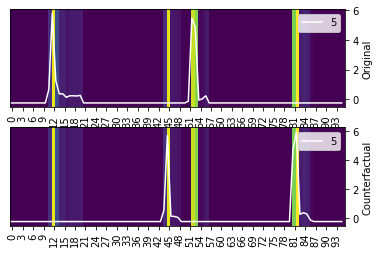

In [15]:
%matplotlib inline
exp_model.plot(item.reshape(-1),np.argmax(y_target,axis=1)[0],exp.reshape(-1),label)

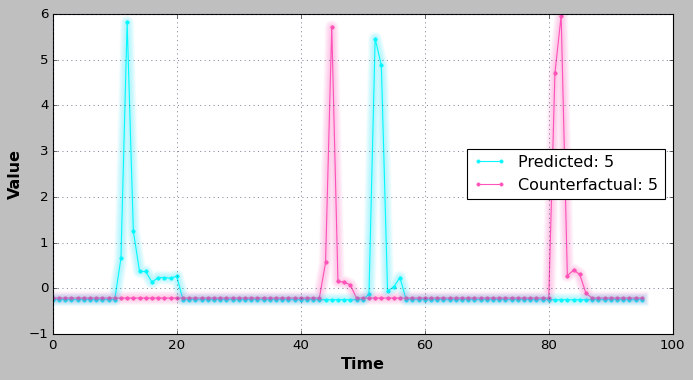

In [16]:
%matplotlib inline
exp_model.plot_in_one(item,np.argmax(y_target,axis=1)[0],exp,label)